In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from keras.models import Model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot


ROWS = 500
COLS = 500

#from PIL import Image 


(500, 500, 2)


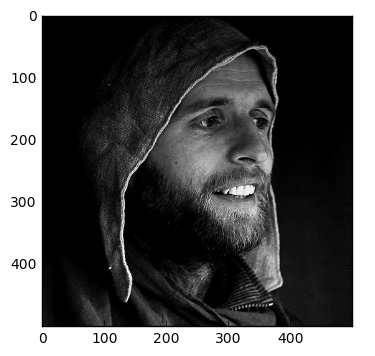

In [52]:
# image_file = Image.open("3372482944_244c25c45f.jpg") # open colour image

img = Image.open('3372482944_244c25c45f.jpg').convert('LA')
arr = np.array(img)
print(arr.shape)
plt.imshow(img)
plt.show()

# col = Image.open("3372482944_244c25c45f.jpg")
# print(col.size)
# gray = col.convert('1')
# print(gray.size)
# #image_file = image_file.convert('1') # convert image to black and white
# plt.imshow(gray)
# plt.show()

# col = Image.open("621496748594232834.jpg")
# gray = col.convert('1')
# print(gray.size)
# #image_file = image_file.convert('1') # convert image to black and white
# plt.imshow(gray)
# plt.show()

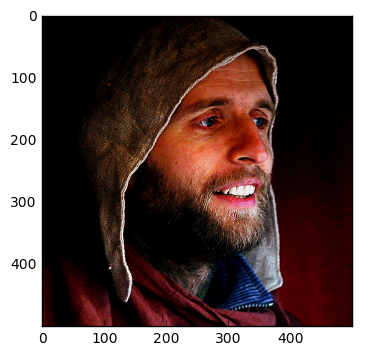

(500, 500, 3)


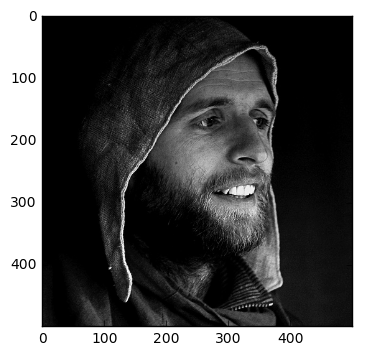

In [127]:
colorImg = cv2.imread('3372482944_244c25c45f.jpg', cv2.IMREAD_COLOR)
colorImg  = cv2.cvtColor(colorImg, cv2.COLOR_BGR2RGB)
plt.imshow(colorImg)
plt.show()
colorImg = colorImg/255.0

grayImg = cv2.imread('3372482944_244c25c45f.jpg', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(grayImg,cv2.COLOR_GRAY2RGB)/255.0
print(backtorgb.shape)
plt.imshow(backtorgb)
plt.show()


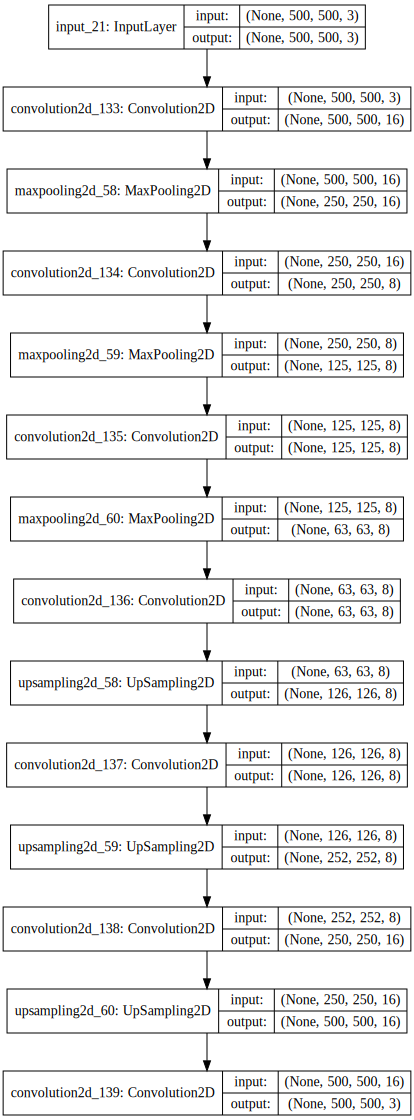

In [141]:
input_img = Input(shape=(ROWS,COLS,3))
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, 3, 3, activation='relu', border_mode='same')(x)
#decoded = Reshape((500, 1500, 1))(decoded) 

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg'))

In [142]:
trainX =np.expand_dims(backtorgb, 0)
trainy =np.expand_dims(colorImg, 0)


In [143]:
autoencoder.fit(trainX, trainy,
                nb_epoch=50,
                batch_size=1,
                shuffle=True)

Epoch 1/50
1/1 [==============================] - 1s - loss: 1.1176
Epoch 2/50
1/1 [==============================] - 0s - loss: 0.6978
Epoch 3/50
1/1 [==============================] - 0s - loss: 0.6026
Epoch 4/50
1/1 [==============================] - 0s - loss: 0.5641
Epoch 5/50
1/1 [==============================] - 0s - loss: 0.5350
Epoch 6/50
1/1 [==============================] - 0s - loss: 0.5105
Epoch 7/50
1/1 [==============================] - 0s - loss: 0.4898
Epoch 8/50
1/1 [==============================] - 0s - loss: 0.4707
Epoch 9/50
1/1 [==============================] - 0s - loss: 0.4525
Epoch 10/50
1/1 [==============================] - 0s - loss: 0.4354
Epoch 11/50
1/1 [==============================] - 0s - loss: 0.4189
Epoch 12/50
1/1 [==============================] - 0s - loss: 0.4029
Epoch 13/50
1/1 [==============================] - 0s - loss: 0.3876
Epoch 14/50
1/1 [==============================] - 0s - loss: 0.3730
Epoch 15/50
1/1 [==========================

In [144]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            (None, 500, 500, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_133 (Convolution2D (None, 500, 500, 16)  448         input_21[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_58 (MaxPooling2D)   (None, 250, 250, 16)  0           convolution2d_133[0][0]          
____________________________________________________________________________________________________
convolution2d_134 (Convolution2D (None, 250, 250, 8)   1160        maxpooling2d_58[0][0]            
___________________________________________________________________________________________

In [145]:
predict = autoencoder.predict(trainX) * 255.0
%matplotlib inline

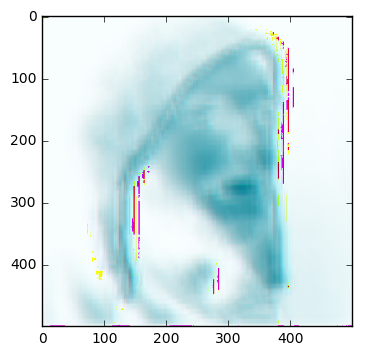

In [146]:
plt.imshow(predict[0].astype(int))

In [133]:
predict[0].astype(int)

array([[[16,  7, 10],
        [19, 10, 11],
        [19, 10, 11],
        ..., 
        [20, 11, 13],
        [20, 11, 13],
        [11,  9, 10]],

       [[20,  7,  9],
        [23, 13, 10],
        [23, 13, 10],
        ..., 
        [25, 15, 12],
        [24, 15, 12],
        [15, 13,  8]],

       [[21,  7,  9],
        [23, 13, 10],
        [24, 13, 10],
        ..., 
        [24, 15, 12],
        [24, 15, 12],
        [14, 14,  8]],

       ..., 
       [[26, 10, 10],
        [31, 19, 12],
        [32, 18, 12],
        ..., 
        [27, 17, 11],
        [26, 17, 11],
        [15, 15,  7]],

       [[25,  8, 10],
        [30, 17, 11],
        [31, 17, 12],
        ..., 
        [26, 16, 11],
        [26, 16, 11],
        [15, 14,  7]],

       [[19,  9,  6],
        [20, 19,  6],
        [21, 20,  6],
        ..., 
        [19, 19,  6],
        [18, 19,  6],
        [10, 21,  5]]])

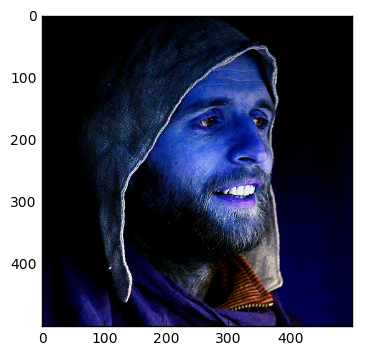

In [124]:
plt.imshow(trainy[0])